In [387]:
timeit x = [random.choice(string.ascii_lowercase) for _ in range(2)]

1.01 µs ± 26.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [388]:
timeit x = random.choices(string.ascii_lowercase, k=2)

901 ns ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [329]:
import math
import random
import string
from typing import List

def random_char():
    return random.choice(string.ascii_lowercase)

def scramble_word(word, p=0.2):
    return ''.join(c if random.random() > p else random_char() for c in word)

def scramble_text(words, p=0.1, q=0.1):
    return [word if random.random() > p else scramble_word(word, p=q) for word in words]

In [330]:
scramble_word("cat", p=0.1)

'cat'

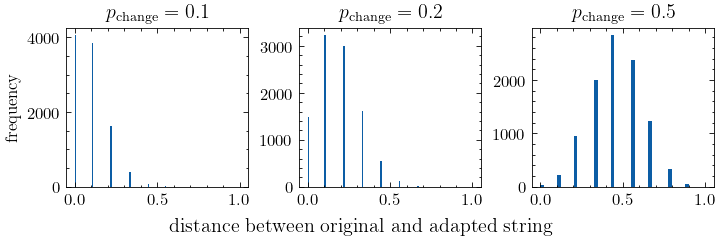

In [161]:
import matplotlib.pyplot as plt
plt.style.use("science")
plt.rcParams["figure.dpi"] = 120
from Levenshtein import ratio as edit_distance

source = "professor"

fig, axes = plt.subplots(ncols=3, figsize=(6, 2), sharex=True, constrained_layout=True)

for i, p in enumerate((0.1, 0.2, 0.5)):
    dists = [1 - edit_distance(source, scramble_word(source, p=p)) for _ in range(10000)]
    axes[i].hist(dists, bins="fd");
    axes[i].set(title=fr"$p_{{\text{{change}}}} = {p}$")
axes[0].set_ylabel("frequency")
fig.supxlabel("distance between original and adapted string");

In [340]:
from spacy.lang.en import English

tokenizer = English().tokenizer

with open("../data/ARCHER3/ARCHER_3-2_TXT/am_advertising/1957sear_a8a.txt", encoding="latin-1") as f:
    text = f.read()

tokens = [token.text.lower() for token in tokenizer(text) if token.text.isalpha()]

In [308]:
diffs = []
for _ in range(10000):
    scrambled_tokens = scramble_text(tokens, p=0.2, q=0.2)
    diffs.append(len(set(scrambled_tokens)) - len(set(tokens)))

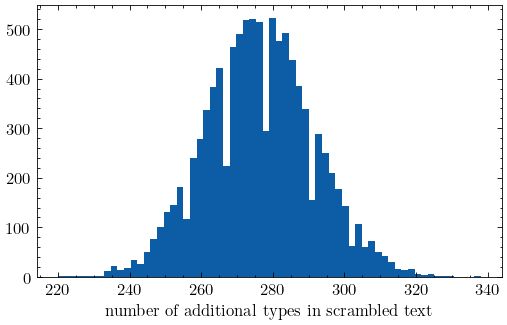

In [309]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.hist(diffs, bins="fd")
ax.set(xlabel="number of additional types in scrambled text");

In [321]:
import numpy as np

diff = np.zeros((100, 1000))
ps = np.linspace(0.0, 1.0, 100)
for i, p in enumerate(ps):
    for j in range(1000):
        scrambled_tokens = scramble_text(tokens, p=p, scramble_p=0.2)
        diff[i, j] = len(set(scrambled_tokens)) / len(set(tokens))

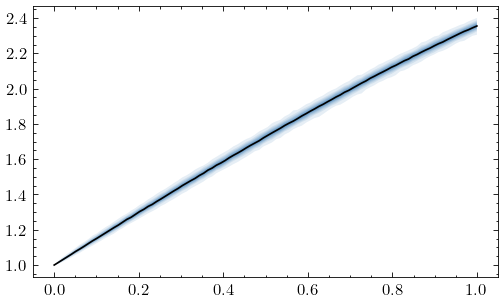

In [322]:
import utils

fig, ax = plt.subplots(figsize=(5, 3))
utils.tsplot(diff.T, x=ps, n=10, ax=ax);

What happens with longer or more texts?

In [343]:
import pathlib
from tqdm.notebook import tqdm

corpus = "../data/ARCHER3/ARCHER_3-2_TXT/br_fiction/"
tokens = []
for fn in pathlib.Path(corpus).iterdir():
    with fn.open(encoding="latin-1") as f:
        text = f.read()
        tokens += [token.text.lower() for token in tokenizer(text) if token.text.isalpha()]


diff_long = np.zeros((100, 100))
ps = np.linspace(0.0, 1.0, 100)
for i, p in enumerate(tqdm(ps)):
    for j in range(100):
        scrambled_tokens = scramble_text(tokens, p=p, q=0.2)
        diff_long[i, j] = len(set(scrambled_tokens)) / len(set(tokens))

  0%|          | 0/100 [00:00<?, ?it/s]

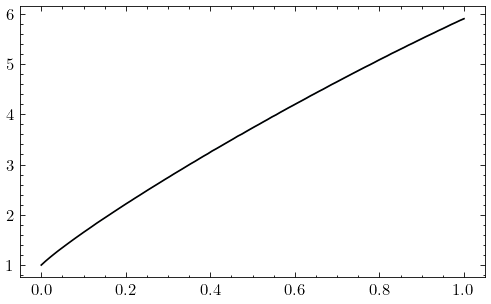

In [344]:
fig, ax = plt.subplots(figsize=(5, 3))
utils.tsplot(diff_long.T, x=ps, n=10, ax=ax);